Number of lines in CSV: (8036, 7)
Min Steering Angle:-0.9426954
Max Steering Angle:1.0


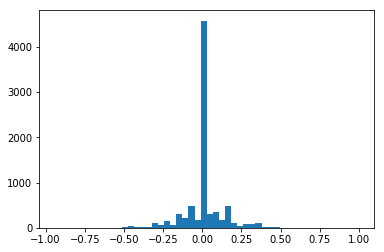

In [1]:
import numpy as np
from PIL import Image, ImageEnhance, ImageOps
import pandas as pd

path = '/data1/udacity/simulator/data'
img_path = path +'/IMG'
csv_file = path +'/driving_log.csv'

csv_array=pd.read_csv(csv_file)

print("Number of lines in CSV: " + str(csv_array.shape))

import matplotlib.pyplot as plt
%matplotlib inline


plt.hist(csv_array.steering, bins=50)
print("Min Steering Angle:" + str(min(csv_array.steering)))
print("Max Steering Angle:" + str(max(csv_array.steering)))

0
1
2
0
1
2


/home/alans/anaconda2/envs/cancer_tutorial_tf/lib/python2.7/site-packages/ipykernel/__main__.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


0
1
2


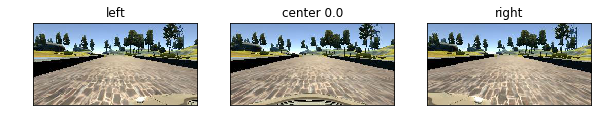

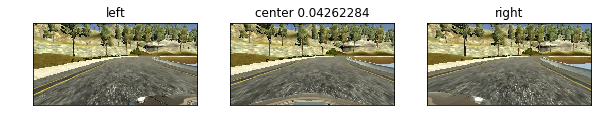

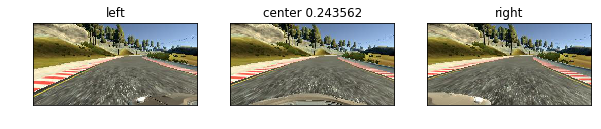

In [2]:
# center, left, right, steering angle, throttle, break, speed

# preprocess the data

X_full_name = []
y_full_angle= []

line = csv_array.iloc[0]
  #print(line)

    
def plotCameraImages(line):
  fig, axes = plt.subplots(1, 3)
  fig.set_figwidth(10)
  fig.set_figheight(20)

  i=0
  for camera in ['left','center','right']:
    print(i)
    axes.flat[i].imshow(Image.open(path+'/'+line[camera].decode('UTF-8').strip()))
    axes.flat[i].tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    if (camera=='center'):
       axes.flat[i].set_title(camera+' ' +str(line['steering']))
    else:
       axes.flat[i].set_title(camera)
        
    i=i+1
    
plotCameraImages(csv_array.iloc[0])
plotCameraImages(csv_array.iloc[1900])
plotCameraImages(csv_array[csv_array.steering < 0.26 ][csv_array.steering>0.24].iloc[4])
    


In [3]:

csv_array.head()


,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


0
(160, 320, 3)
1
(160, 320)
2
(66, 200, 3)


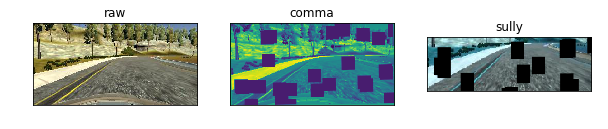

In [4]:
import driving_data

filename = driving_data.val_xs[0]
img=[]
img.append( np.array(Image.open(filename)))
#img.append( driving_data.process_image_comma(filename).transpose( 1, 2, 0) )
img.append(driving_data.process_image_gray(filename))
img.append( driving_data.process_image_sully(filename) )


fig, axes = plt.subplots(1, 3)
fig.set_figwidth(10)
fig.set_figheight(20)

i=0
for camera in ['raw','comma','sully']:
    print(i)
    print(img[i].shape)
    axes.flat[i].imshow(img[i])
    axes.flat[i].tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
    axes.flat[i].set_title(camera)
    i=i+1



(array([   1.,    1.,    4.,    4.,    5.,    2.,    5.,    6.,   10.,
          22.,    9.,   17.,    9.,    5.,   21.,   43.,   24.,   17.,
          91.,   22.,   17.,  111.,   31.,   47.,   37.,   56.,   10.,
          34.,   31.,   45.,   15.,    4.,    8.,   11.,   10.,    7.,
           4.,    8.,    3.,    4.,    2.,    3.,    2.,    1.,    0.,
           0.,    0.,    1.,    0.,    2.]),
 array([-0.4964977 , -0.47346757, -0.45043744, -0.4274073 , -0.40437717,
        -0.38134704, -0.35831691, -0.33528678, -0.31225664, -0.28922651,
        -0.26619638, -0.24316625, -0.22013612, -0.19710598, -0.17407585,
        -0.15104572, -0.12801559, -0.10498546, -0.08195532, -0.05892519,
        -0.03589506, -0.01286493,  0.0101652 ,  0.03319534,  0.05622547,
         0.0792556 ,  0.10228573,  0.12531586,  0.148346  ,  0.17137613,
         0.19440626,  0.21743639,  0.24046652,  0.26349666,  0.28652679,
         0.30955692,  0.33258705,  0.35561718,  0.37864732,  0.40167745,
         0.42470

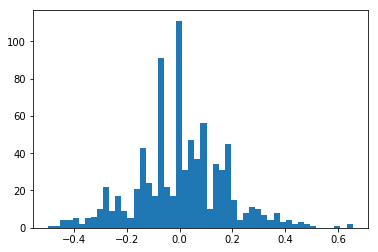

In [6]:
plt.hist(driving_data.val_ys, bins=50)